## 6.2: Exploring Relationships

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Change the format of the values visualization

pd.options.display.float_format = '{:.2f}'.format

# Reset the maximum number of columns to display to default (all columns)

pd.set_option('display.max_columns', None)

In [2]:
# Defining the path to datasets

path = r'C:\Users\efens\cf_tasks\2023-08 Steam Analysis'

## 00. Importing project data

In [3]:
# Importing project data "player_merged"

player_merged = pd.read_csv(os.path.join(path, '02 Data', '022 Prepared Data', 'player_merged.csv'))

In [4]:
# Importing project data "steam_merged"

steam_merged = pd.read_csv(os.path.join(path, '02 Data', '022 Prepared Data', 'steam_merged.csv'))

## Handling mistakes in saving

In [5]:
# Converting Year to a proper datetime

steam_merged['dev_year'] = pd.to_datetime(steam_merged['dev_year'], format='%Y').dt.strftime('%Y')
steam_merged['dev_year'].head()

0    1996
1    1996
2    1996
3    1996
4    1999
Name: dev_year, dtype: object

In [6]:
# Checking missing values after saving issue

missing_steam = steam_merged.isnull().sum()
missing_steam

appid                          0
name                           0
release_date                   0
english                        0
developer                      0
publisher                      0
platforms                      0
required_age                   0
categories                     0
genres                         0
steamspy_tags                  0
achievements                   0
positive_ratings               0
negative_ratings               0
average_playtime               0
median_playtime                0
owners                         0
price                          0
price_eur                      0
owners_min                     0
owners_max                     0
owners_avg                     0
gameplay_type                  0
dev_year                   26100
country                    25726
city                       25756
administrative_division    26423
dtype: int64

In [7]:
# Filling missing values in the merged DataFrame with 'N/A'

steam_merged.fillna('N/A', inplace=True)

#### Doing the same for player dataset

In [8]:
player_merged.head(3)

,name,Month_Year,Avg_players,Peak_Players,Date,URL,release_date,developer,country,genres,average_playtime,owners_avg,gameplay_type
0,Counter Strike: Global Offensive,September 2021,512350.92,942519,2021-09-01,https://steamcharts.com/app/730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Counter Strike: Global Offensive,August 2021,512081.96,802544,2021-08-01,https://steamcharts.com/app/730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Counter Strike: Global Offensive,July 2021,506067.36,763523,2021-07-01,https://steamcharts.com/app/730,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Checking missing values after saving issue

missing_player = player_merged.isnull().sum()
missing_player

name                   0
Month_Year             0
Avg_players            0
Peak_Players           0
Date                   0
URL                    0
release_date        1819
developer           1819
country             3324
genres              1819
average_playtime    1819
owners_avg          1819
gameplay_type       1819
dtype: int64

In [10]:
# Filling missing values in the merged DataFrame with 'N/A'

player_merged.fillna('N/A', inplace=True)

## 01. Picking out variables suitable for the exploratory visual analysis

#### For the Part 1 of the analysis: Profitability and Popularity of Different Game Types

1. What factors have the most impact on the price of game? -->  Variables: developer, required_age, genres, positive_ratings, negative_ratings, price_eur, gameplay_type
2. What type of games (single-player, multiplayer, online multiplayer) potentially bring the highest amount of profit? --> gameplay_type, price_eur, owners_avg
3. Does the cost of the game influence the number of users within each game type?

####  For the Part 1 of the analysis: Popularity of Country-Developed Games

4. Is there a correlation between a game's cost and its popularity in terms of users? --> price_eur, owners_avg, median_playtime

In [11]:
steam_merged.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'price_eur',
       'owners_min', 'owners_max', 'owners_avg', 'gameplay_type', 'dev_year',
       'country', 'city', 'administrative_division'],
      dtype='object')

In [12]:
# Keep only the variables you want to use in the plots

sub_1 = steam_merged[['developer', 'required_age', 'genres', 'positive_ratings','negative_ratings', 'price_eur', 'gameplay_type', 'owners_avg', 'median_playtime']]

In [13]:
player_merged.columns

Index(['name', 'Month_Year', 'Avg_players', 'Peak_Players', 'Date', 'URL',
       'release_date', 'developer', 'country', 'genres', 'average_playtime',
       'owners_avg', 'gameplay_type'],
      dtype='object')

In [14]:
sub_2 = player_merged[['genres','Avg_players', 'Peak_Players', 'developer', 'genres', 'owners_avg', 'gameplay_type']]

## 02: Creating a correlation matrix heatmap

In [15]:
sub_1.describe()

,required_age,positive_ratings,negative_ratings,price_eur,owners_avg,median_playtime
count,27233.00,27233.00,27233.00,27233.00,27233.00,27233.00
mean,0.36,1039.75,215.80,7.09,137266.74,147.35
std,2.41,19120.30,4287.20,9.16,1330013.50,2348.52
min,0.00,0.00,0.00,0.00,10000.00,0.00
25%,0.00,6.00,2.00,1.96,10000.00,0.00
50%,0.00,25.00,9.00,4.63,10000.00,0.00
75%,0.00,129.00,42.00,8.34,35000.00,0.00
max,18.00,2644404.00,487076.00,489.51,150000000.00,190625.00


In [16]:
sub_1.dtypes

developer            object
required_age          int64
genres               object
positive_ratings      int64
negative_ratings      int64
price_eur           float64
gameplay_type        object
owners_avg          float64
median_playtime       int64
dtype: object

#### Question 1: What factors have the most impact on the price of game? 

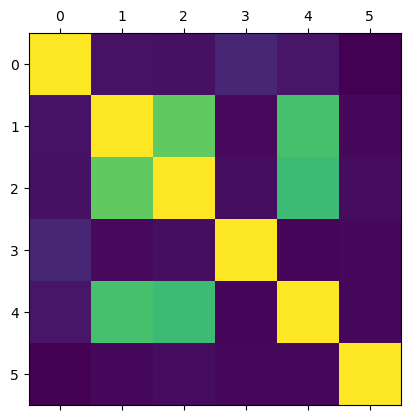

In [17]:
# Create a correlation heatmap using matplotlib

correlation_matrix_1 = sub_1.corr(numeric_only=True)  # Explicitly set numeric_only parameter to True

plt.matshow(correlation_matrix_1)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix for the 1st question')

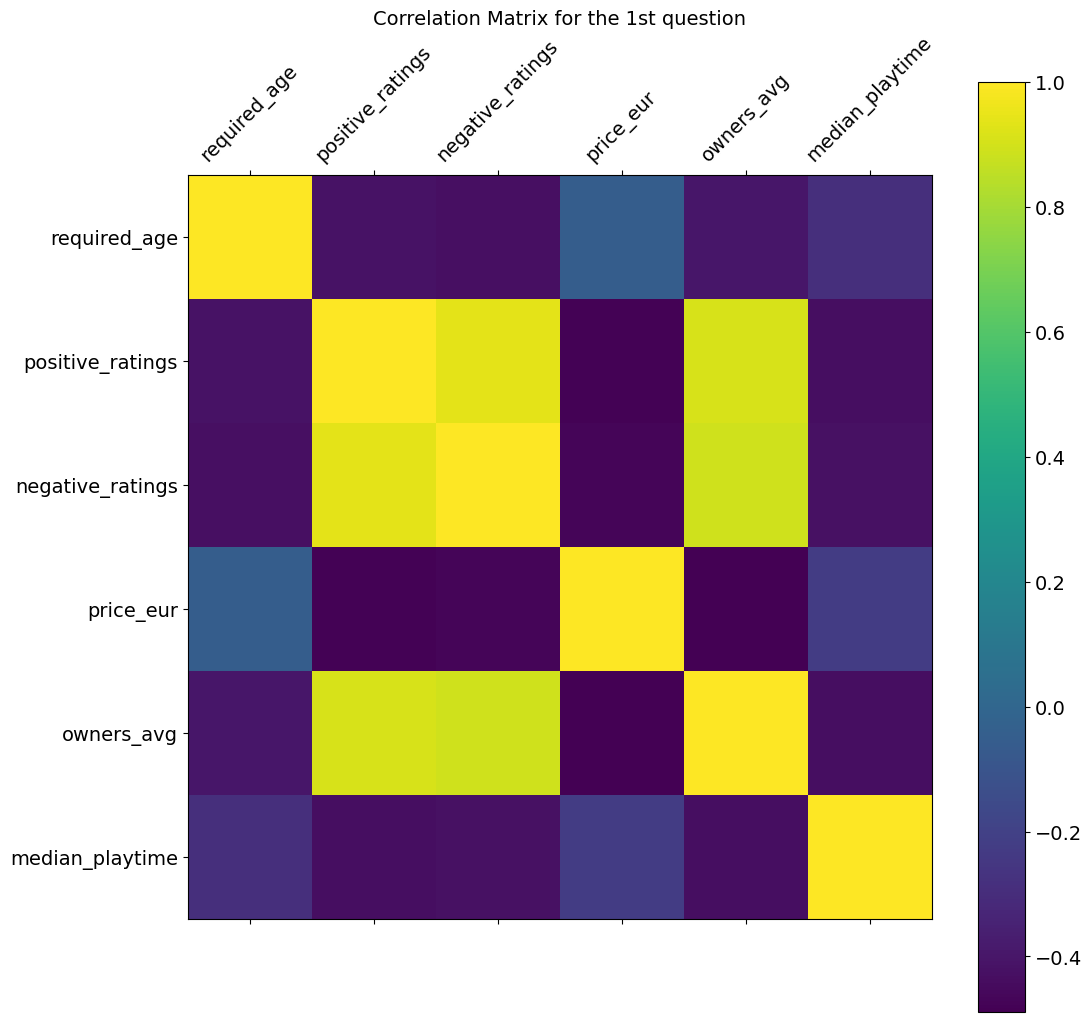

In [18]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(12, 12)) # Create a figure with a defined size

# Plot the correlation matrix using matshow on the created figure
plt.matshow(correlation_matrix_1.corr(), fignum=f.number) # type of plot

# Set x and y axis labels with rotation for better readability
plt.xticks(range(correlation_matrix_1.shape[1]), correlation_matrix_1.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(correlation_matrix_1.shape[1]), correlation_matrix_1.columns, fontsize=14) # y axis labels

# Add a colorbar to the plot for the legend
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size

# Set the title for the plot
plt.title('Correlation Matrix for the 1st question', fontsize=14) # add title

#### Saving the output:

In [20]:
image_path = os.path.join(path, '04 Analysis', '041 Visualizations', 'corr_matrix_1_question1.png')
f.savefig(image_path)

#### Using Matplotlib

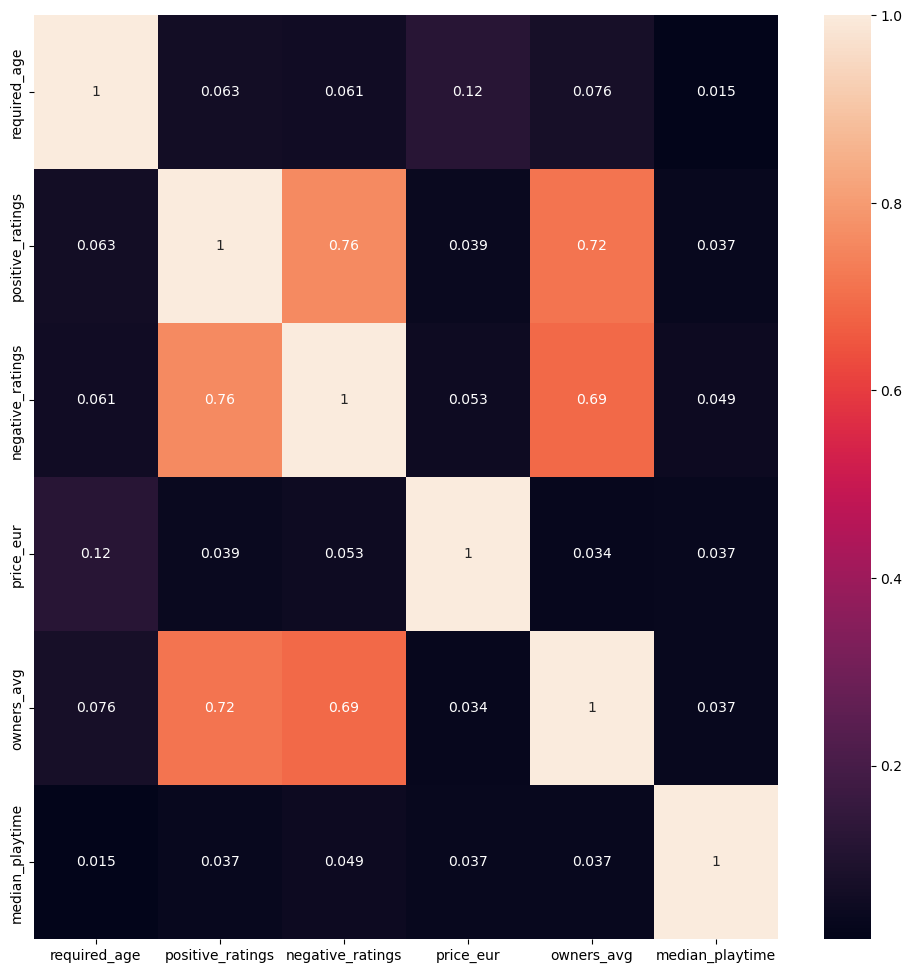

In [21]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(12,12))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub_1.corr(numeric_only=True), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

#### Saving output

In [22]:
image_path = os.path.join(path, '04 Analysis', '041 Visualizations', 'corr_matrix_2_question1.png')
f.savefig(image_path)

#### Conclusions

In [23]:
sub_1.corr(numeric_only=True)

,required_age,positive_ratings,negative_ratings,price_eur,owners_avg,median_playtime
required_age,1.00,0.06,0.06,0.12,0.08,0.01
positive_ratings,0.06,1.00,0.76,0.04,0.72,0.04
negative_ratings,0.06,0.76,1.00,0.05,0.69,0.05
price_eur,0.12,0.04,0.05,1.00,0.03,0.04
owners_avg,0.08,0.72,0.69,0.03,1.00,0.04
median_playtime,0.01,0.04,0.05,0.04,0.04,1.00


- There is no correlation between variable price, required age and ratings.
- There is only a correlation between the number of positive and negative ratings, and average number of owners. This seems logical and does not require further investigation, if the game is popular and has many owners, there should be a large number of ratings, both positive and negative. 

#### Question 4: Is there a correlation between a game's cost and its popularity in terms of users?

- No correlation was found between price_eur, owners_avg and median_playtime

#### Exploring all correlation in numerical varibales withing the dataset steam_merged

In [24]:
steam_merged.corr(numeric_only=True)

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,price_eur,owners_min,owners_max,owners_avg
appid,1.00,-0.12,-0.09,0.04,-0.07,-0.05,-0.07,-0.05,-0.16,-0.16,-0.13,-0.13,-0.13
english,-0.12,1.00,0.00,0.01,0.01,0.01,0.00,-0.00,0.01,0.01,0.01,0.01,0.01
required_age,-0.09,0.00,1.00,-0.01,0.06,0.06,0.04,0.01,0.12,0.12,0.07,0.08,0.08
achievements,0.04,0.01,-0.01,1.00,0.01,0.00,0.01,0.01,-0.01,-0.01,0.00,0.00,0.00
positive_ratings,-0.07,0.01,0.06,0.01,1.00,0.76,0.16,0.04,0.04,0.04,0.72,0.71,0.72
negative_ratings,-0.05,0.01,0.06,0.00,0.76,1.00,0.16,0.05,0.05,0.05,0.70,0.69,0.69
average_playtime,-0.07,0.00,0.04,0.01,0.16,0.16,1.00,0.91,0.05,0.05,0.18,0.18,0.18
median_playtime,-0.05,-0.00,0.01,0.01,0.04,0.05,0.91,1.00,0.04,0.04,0.04,0.04,0.04
price,-0.16,0.01,0.12,-0.01,0.04,0.05,0.05,0.04,1.00,1.00,0.03,0.03,0.03
price_eur,-0.16,0.01,0.12,-0.01,0.04,0.05,0.05,0.04,1.00,1.00,0.03,0.03,0.03


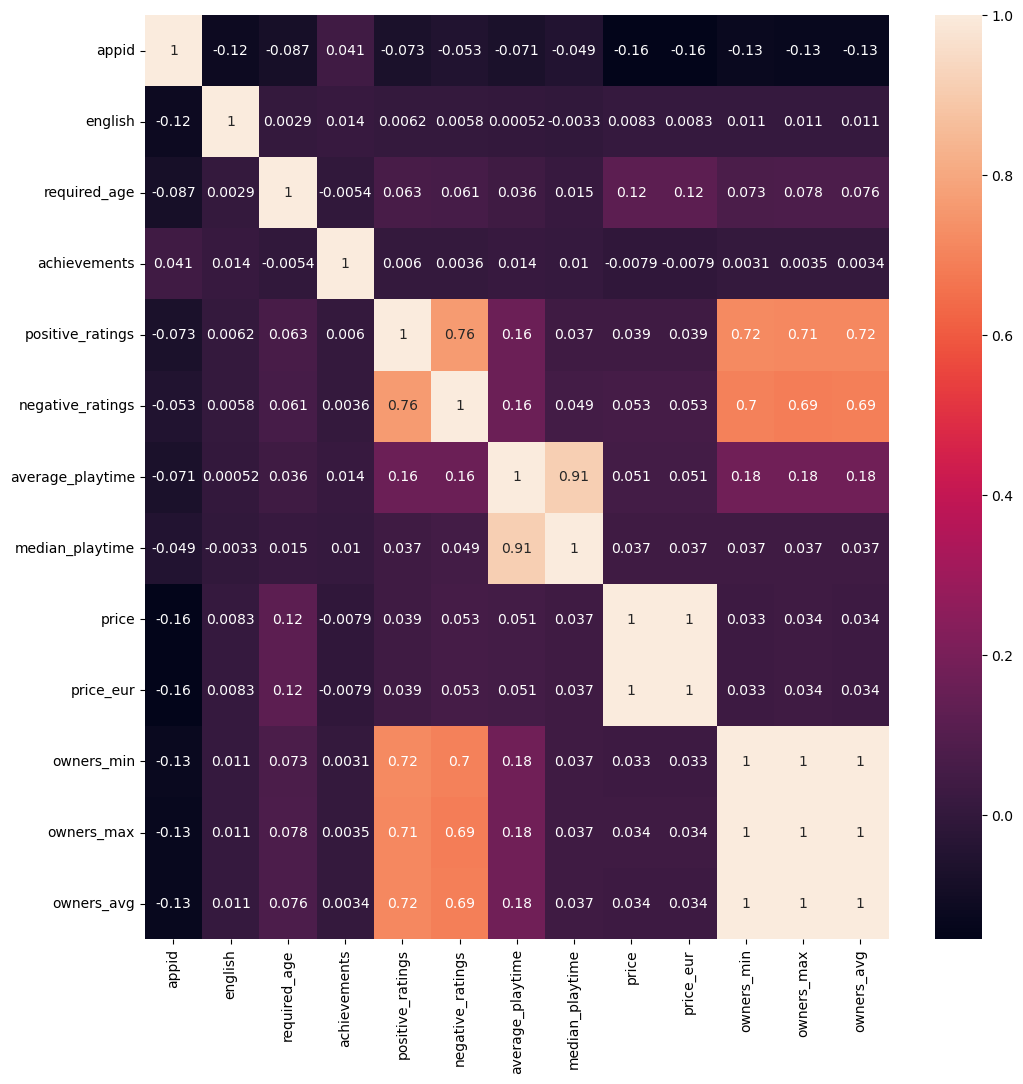

In [25]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(12,12))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(steam_merged.corr(numeric_only=True), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

#### Saving output

In [26]:
image_path = os.path.join(path, '04 Analysis', '041 Visualizations', 'corr_matrix_all_steam.png')
f.savefig(image_path)

## 03. Creating a scatterplot for the variables 'owners_avg', 'positive_ratings', 'negative_ratings'

In [27]:
steam_merged[['owners_avg', 'positive_ratings', 'negative_ratings']].describe()

,owners_avg,positive_ratings,negative_ratings
count,27233.00,27233.00,27233.00
mean,137266.74,1039.75,215.80
std,1330013.50,19120.30,4287.20
min,10000.00,0.00,0.00
25%,10000.00,6.00,2.00
50%,10000.00,25.00,9.00
75%,35000.00,129.00,42.00
max,150000000.00,2644404.00,487076.00


Text(0.5, 1.0, 'Scatterplot: Average Owners vs Positive Ratings')

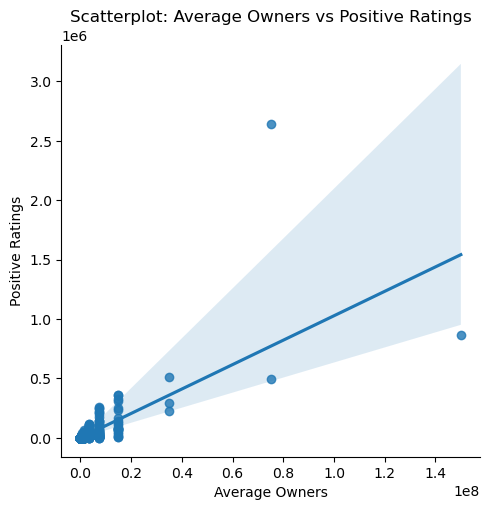

In [28]:
# Create the scatterplot for owners_avg and positive_ratings

plot = sns.lmplot(x='owners_avg', y='positive_ratings', data=steam_merged)

# Set labels and title if desired
plt.xlabel('Average Owners')
plt.ylabel('Positive Ratings')
plt.title('Scatterplot: Average Owners vs Positive Ratings')

In [29]:
# Saving the scatterplot

image_path = os.path.join(path, '04 Analysis', '041 Visualizations', 'Scatterplot_Owners_Positive_Ratings.png')
plot.savefig(image_path)

Text(0.5, 1.0, 'Scatterplot: Average Owners vs Negative Ratings')

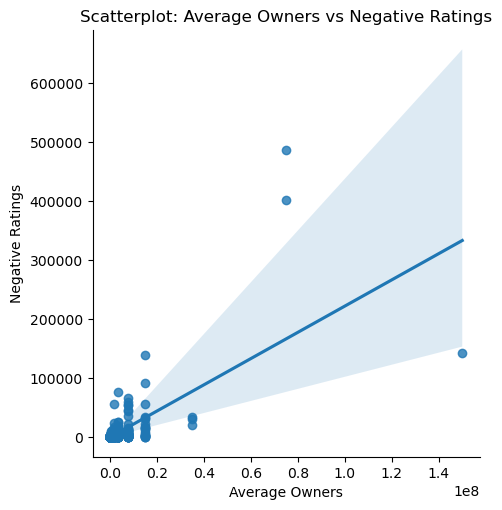

In [30]:
# Create the scatterplot for owners_avg and negative_ratings

plot = sns.lmplot(x='owners_avg', y='negative_ratings', data=steam_merged)

# Set labels and title if desired
plt.xlabel('Average Owners')
plt.ylabel('Negative Ratings')
plt.title('Scatterplot: Average Owners vs Negative Ratings')

In [31]:
# Saving the scatterplot

image_path = os.path.join(path, '04 Analysis', '041 Visualizations', 'Scatterplot_Owners_Negative_Ratings.png')
plot.savefig(image_path)

#### Conclustions

- As expected, the number of both positive and negative reviews increases depending on the number of ovners. 

## 04. Creating a pair plots of the datasets

--> Steam_Merged

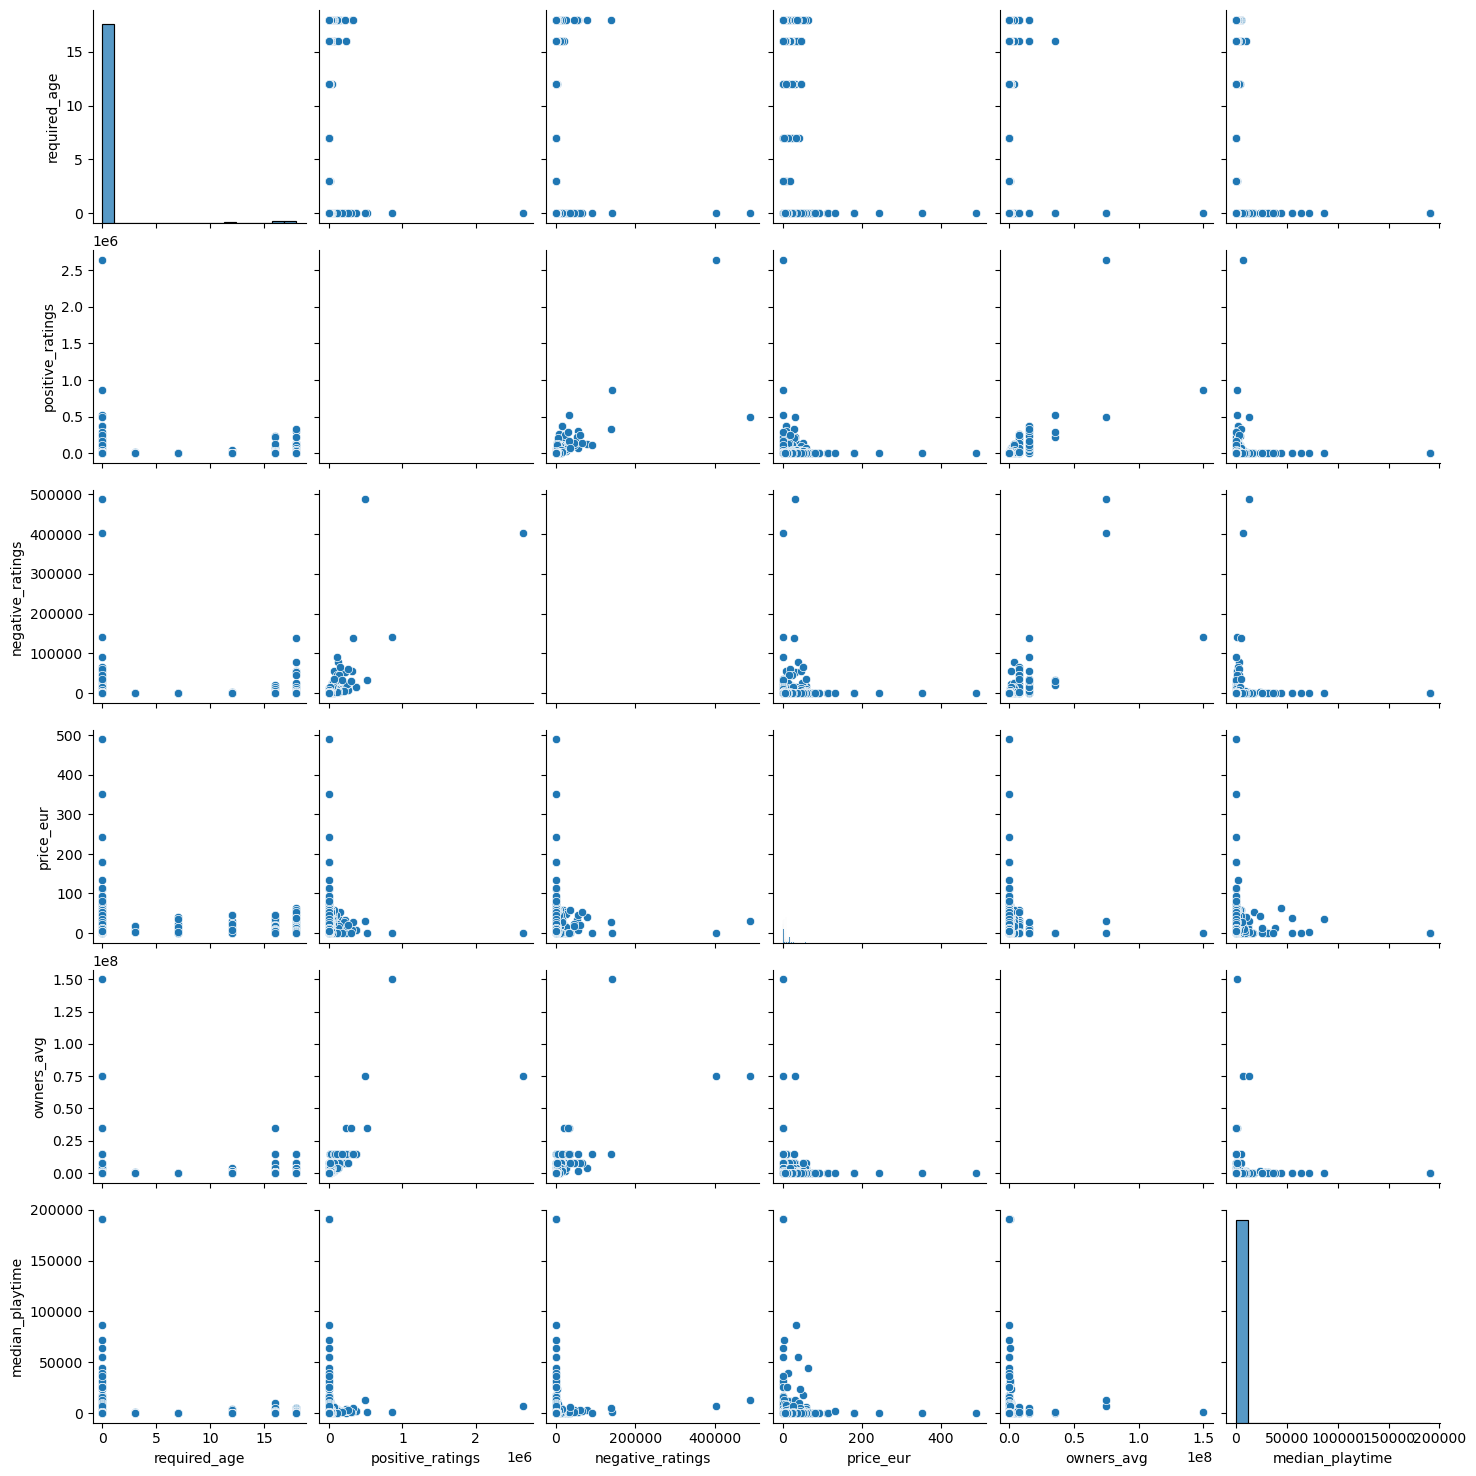

In [32]:
# Create a pair plot 

g = sns.pairplot(sub_1)

#### Conclusion:

- It appears that the game with the required age has more owners, but the average play time without the required age is longer.
- Median play time is longer for games with a lower price.
- Median play time is longer for games with fewer owners (based on the average number of owners)

#### Variables for the futher inverstigation are:

- owners_avg
- required_age
- median_playtime

In [33]:
# Saving the plot

image_path = os.path.join(path, '04 Analysis', '041 Visualizations', 'pairplot_steam.png')
g.savefig(image_path)

## 05. Creating a categorical plot

#### Question 2: What type of games (single-player, multiplayer, online multiplayer) potentially bring the highest amount of profit? --> gameplay_type, price_eur, owners_avg

In [34]:
# Calculation a new varibale 'avg_profit'

# Creating a new column avg_profit = 'owners_avg'*'price_eur'

steam_merged['avg_profit'] = steam_merged['owners_avg'] * steam_merged['price_eur']

In [35]:
steam_merged.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,price_eur,owners_min,owners_max,owners_avg,gameplay_type,dev_year,country,city,administrative_division,avg_profit
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,8.34,10000000,20000000,15000000.00,Multi-Player,1996,United States,Kirkland,Washington,125106000.00
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,4.63,5000000,10000000,7500000.00,Multi-Player,1996,United States,Kirkland,Washington,34713000.00
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,4.63,5000000,10000000,7500000.00,Multi-Player,1996,United States,Kirkland,Washington,34713000.00
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,4.63,5000000,10000000,7500000.00,Multi-Player,1996,United States,Kirkland,Washington,34713000.00
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,4.63,5000000,10000000,7500000.00,Multi-Player,1999,United States,Plano,Texas,34713000.00


In [36]:
steam_merged['gameplay_type'].value_counts()

Single Player          22610
Multi-Player            3526
Other                    510
Online Multi-Player      473
MMO                      114
Name: gameplay_type, dtype: int64

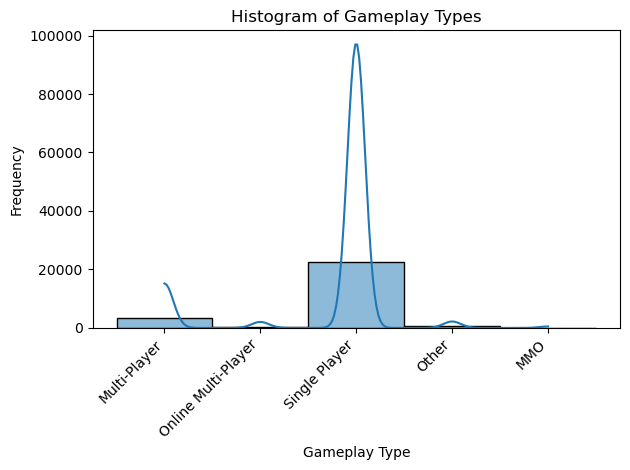

In [37]:
plot = sns.histplot(steam_merged['gameplay_type'], bins=20, kde=True)

# Set title
plt.title('Distribution of Gameplay Types')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Gameplay Type')
plt.ylabel('Frequency')
plt.title('Histogram of Gameplay Types')
plt.tight_layout()

# Show the plot
plt.show()

In [38]:
# Saving the plot

image_path = os.path.join(path, '04 Analysis', '041 Visualizations', 'gameplay_distr.png')
plt.savefig(image_path)

<Figure size 640x480 with 0 Axes>

In [39]:
# Calculate the sum of average profits for each gameplay type
sum_profit_per_type = steam_merged.groupby('gameplay_type')['avg_profit'].sum().reset_index()

In [41]:
# Investigatina the meanings

sum_profit_per_type.describe()

,avg_profit
count,5.00
mean,7565555194.40
std,8955900217.21
min,86804250.00
25%,315636986.00
50%,3050746350.00
75%,15343338734.00
max,19031249652.00


In [60]:
from tabulate import tabulate

# Order the values from biggest to smallest
sum_profit_per_type = sum_profit_per_type.sort_values(by='avg_profit', ascending=False)

# Round the values to two decimal places
sum_profit_per_type['avg_profit'] = sum_profit_per_type['avg_profit'].round(2)

# Create a table
table = tabulate(sum_profit_per_type, headers='keys', tablefmt='pretty')

# Print the table
print(table)

+---+---------------------+---------------+
|   |    gameplay_type    |  avg_profit   |
+---+---------------------+---------------+
| 4 |    Single Player    | 19031249652.0 |
| 1 |    Multi-Player     | 15343338734.0 |
| 2 | Online Multi-Player | 3050746350.0  |
| 3 |        Other        |  315636986.0  |
| 0 |         MMO         |  86804250.0   |
+---+---------------------+---------------+


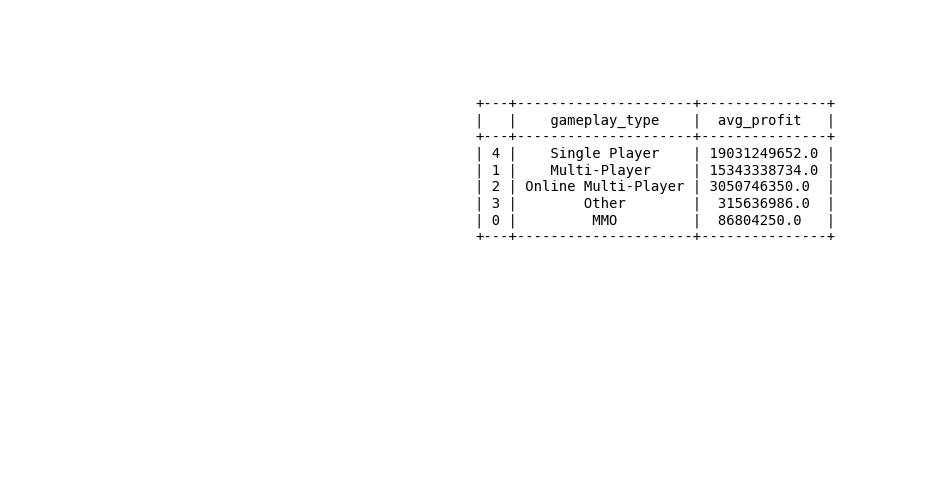

In [61]:
# Save the table as a PNG image

m = plt.figure(figsize=(12, 6))
plt.text(0.5, 0.5, table, {'fontsize': 10}, fontfamily='monospace')
plt.axis('off')  # Turn off axes
plt.savefig('table_output.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

In [62]:
# Saving the output as a picture

image_path = os.path.join(path, '04 Analysis', '041 Visualizations', 'gameplaytype_profit.png')
m.savefig(image_path)

#### Conclustion:

- The highest profit, taking into account the calculation of average profit (game price multiplied by the average number of owners), comes from single-player games, which amounts to 19,031.25 million euros. Multiplayer games follow them with 15,343.34 million euros. 
- The lowest profit is generated by sales of MMO games (Massively multiplayer online game), 86.80 million euros. However, it's worth noting that we have data exclusively on the sales of the games themselves, not the sales of loot boxes and other in-game items within MMO games.

#### Question 3: Does the cost of the game influence the number of users within each gameplay type?

- Calculate the correlation between the variables price_eur and owners_avg, for the gameplay_type Single Player

In [63]:
# Filtering and creating a new dataframe

single_player_data = steam_merged[steam_merged['gameplay_type'] == 'Single Player']

In [64]:
single_player_data['price_eur'].corr(single_player_data['owners_avg'])

0.08452490399210312

In [66]:
# Filtering and creating a new dataframe

multi_player_data = steam_merged[steam_merged['gameplay_type'] == 'Multi-Player']

In [67]:
multi_player_data['price_eur'].corr(multi_player_data['owners_avg'])

-0.006509462942020187

In [68]:
# Filtering and creating a new dataframe

online_multi_player_data = steam_merged[steam_merged['gameplay_type'] == 'Online Multi-Player']

online_multi_player_data['price_eur'].corr(online_multi_player_data['owners_avg'])

0.08478926267511819

In [69]:
# Filtering and creating a new dataframe

mmo_data = steam_merged[steam_merged['gameplay_type'] == 'MMO']

mmo_data['price_eur'].corr(mmo_data['owners_avg'])

-0.10552001881673816

#### Conclusion:

- No correlations were found between price and number of owners within each gameplay type. That means that there are other factors that could have an influence on the game price.

## 06. Exporting the new datasets for MMO and Online Multi-Player for Part 3 of the analysis

In [70]:
mmo_data.to_csv(os.path.join(path, '02 Data','022 Prepared Data', 'mmo_data.csv'), header=True, index=False)

In [71]:
online_multi_player_data.to_csv(os.path.join(path, '02 Data','022 Prepared Data', 'online_multi_player_data.csv'), header=True, index=False)